In [18]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras


## Constants

In [19]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50


## Loading data

In [20]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    rotation_range=10,
)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\my\Desktop\Programming\Deep Learning\potato disease\training\dataset\train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)


Found 1506 images belonging to 3 classes.


In [21]:
val_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    rotation_range=10,
)

val_generator = val_datagen.flow_from_directory(
    r"C:\Users\my\Desktop\Programming\Deep Learning\potato disease\training\dataset\val",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)


Found 215 images belonging to 3 classes.


In [22]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    rotation_range=10,
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\my\Desktop\Programming\Deep Learning\potato disease\training\dataset\test",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="sparse"
)


Found 431 images belonging to 3 classes.


In [23]:
class_names = ['Potato___Early_blight',
               'Potato___Late_blight',
               'Potato___healthy']


## EDA

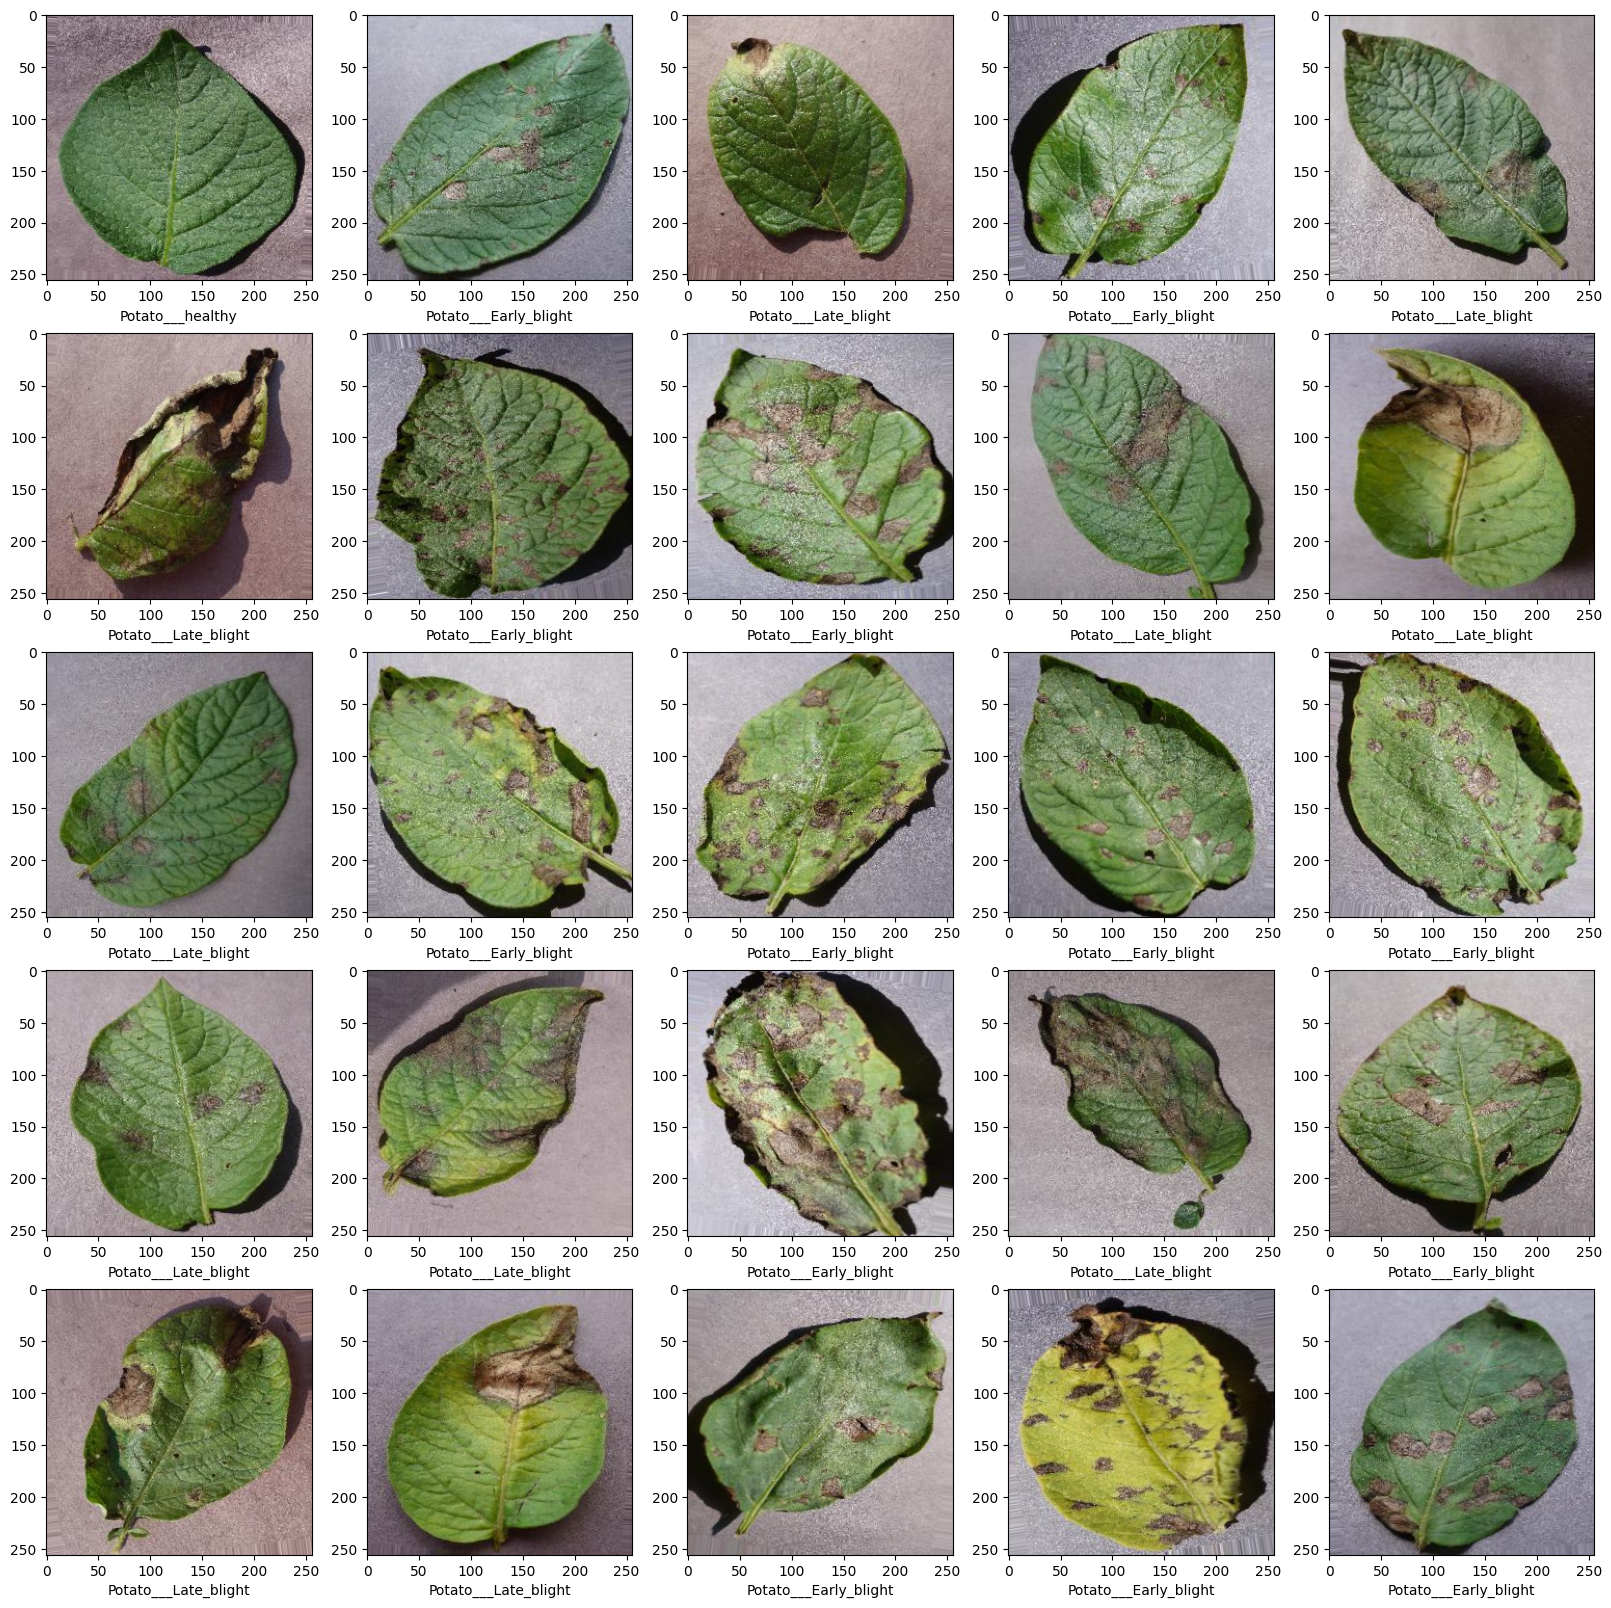

In [24]:
for image, label in train_generator:
    plt.figure(figsize=(20, 20))
    i = 1
    for index in range(0, 25, 1):
        plt.subplot(5, 5, i)
        i = i+1
        plt.imshow(image[index])
        plt.xlabel(class_names[int(label[index])])
    break


## Model Creation and Training

In [25]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = keras.models.Sequential([
    # cnn
    keras.layers.InputLayer(input_shape=input_shape),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),

    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(n_classes, activation="softmax")
])

model.build(input_shape=input_shape)


In [26]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [27]:
model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(
                  from_logits=False),
              metrics=["accuracy"])


In [28]:
history = model.fit(train_generator,
                    steps_per_epoch=47,
                    epochs=1,
                    verbose=1,
                    batch_size=BATCH_SIZE,
                    validation_data=val_generator,
                    validation_steps=6)


47/47 [==============================] - 93s 2s/step - loss: 0.9149 - accuracy: 0.4925 - val_loss: 0.9065 - val_accuracy: 0.4479


## Evaluation

In [29]:
scores = model.evaluate(test_generator)


14/14 [==============================] - 22s 2s/step - loss: 0.8803 - accuracy: 0.4640


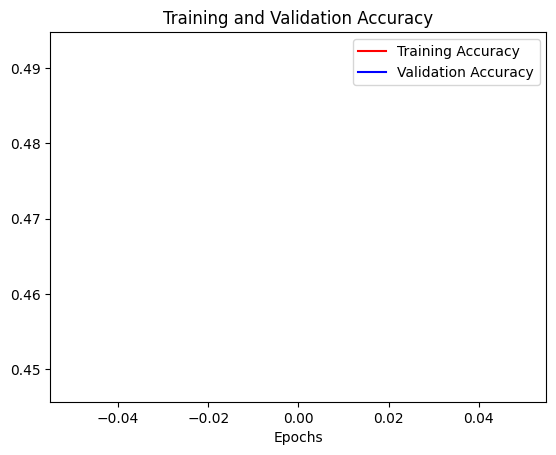

<Figure size 640x480 with 0 Axes>

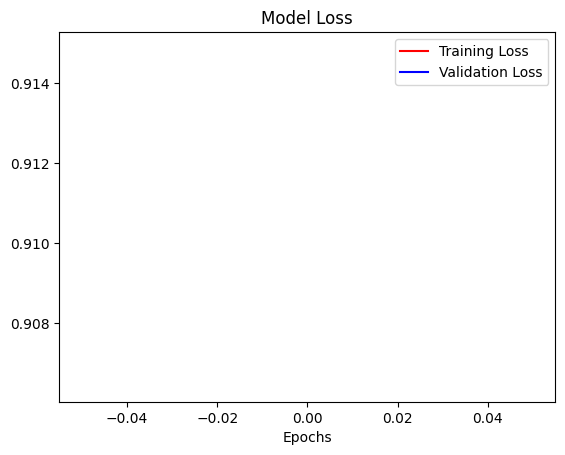

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel("Epochs")
plt.legend()
plt.show()


In [33]:
def predict(model, img):
    img_array = keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)

    predict_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predict_class, confidence


1/1 [==============================] - 0s 37ms/step


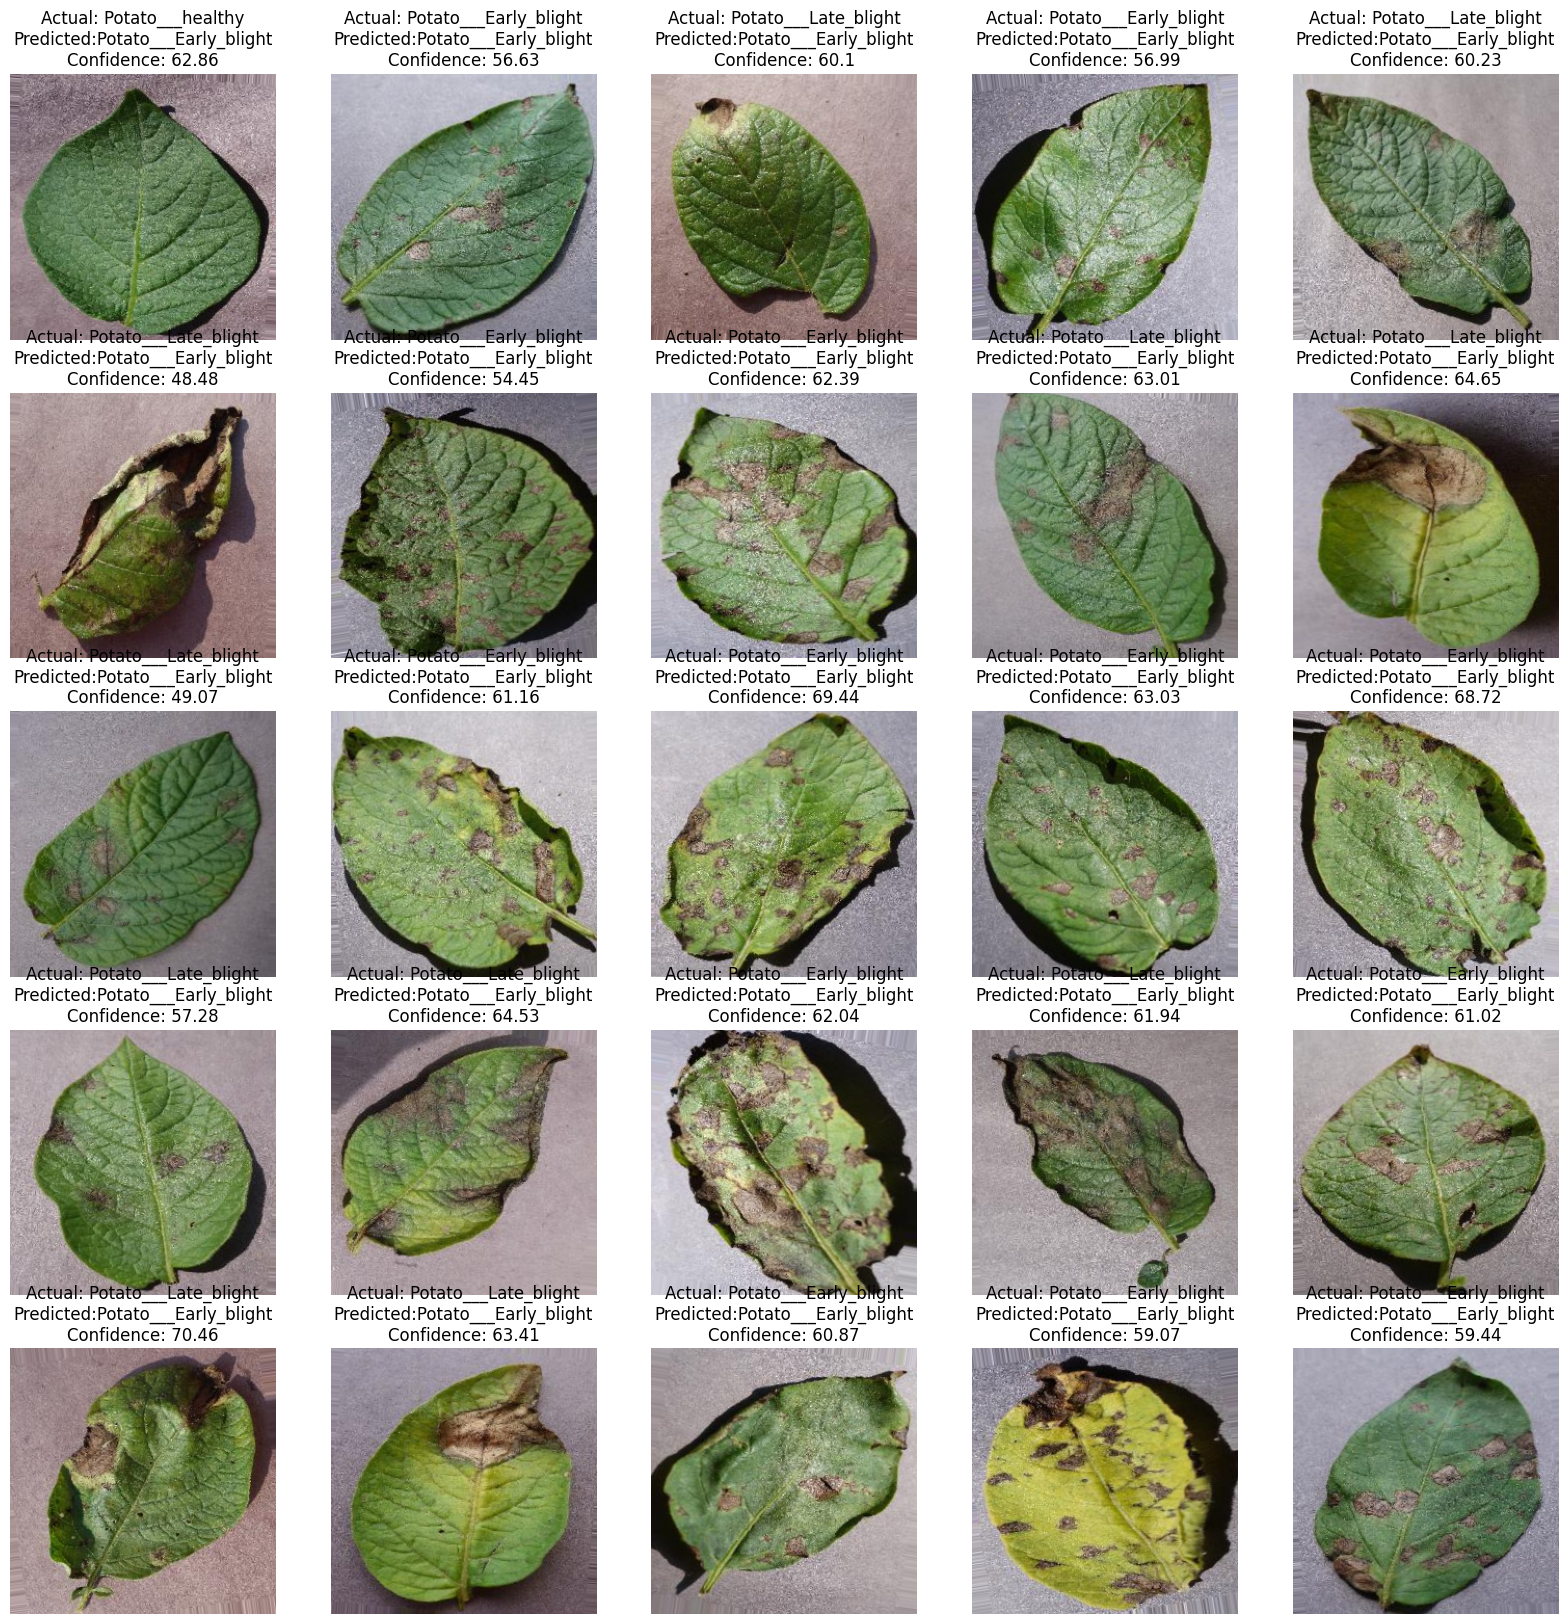

In [35]:
for images, labels in test_generator:
    plt.figure(figsize=(20, 20))
    i = 1
    for index in range(0, 25, 1):
        plt.subplot(5, 5, i)
        i = i+1
        plt.imshow(image[index])

        predicted_class, confidence = predict(model, image[index])
        actual_class = class_names[int(label[index])]

        plt.title(
            f"Actual: {actual_class}\nPredicted:{predicted_class}\nConfidence: {confidence}")
        plt.axis("off")
    break


In [ ]:
model.save("potaoes.h5")
